#ML4Net - Lab 2

## Team members

Arnau Ruiz Gonzalez   205481 | Iago Alés Olmedo   268260 |

## Description

In this lab, you will implement an ML model that detects congestion in Wi-Fi networks. In particular, you will desing and implement a supervised learning model (e.g., linear regression, multi-layer perceptron, neural network), which you will train using a dataset that was generated using the ns-3 simulator.

Each row in the dataset is organized as (x1, x2, ..., x26, y1, y2, ..., y26, s, r, l), where:

* `x1, x2..., x26, y1, y2, ..., y26` represent the histogram of the Inter-Frame Space (IFS) values for M frames that accessed the medium in a 60 seconds observation sample.
  * `x26` represents the maximum IFS duration (in ms) in the considered M frames whereas `x1` is `x26`/26
  * The remaining `xi` values are buckets at uniform spacing between `x1` and `x26`.
  * For i>1, the values of `yi` represent the IFS histogram count (in percentage) for a corresponding bucket interval between `xi`-1 and `xi`.
  * In the case of `y1`, the bucket interval is between 0 and `x1`
* `s` is the average IFS duration (in ms)
* `r` is the percentage of frame collisions
* `l` is the label, where 1 indicates that the network is saturated, and 0, that it is not

Original dataset: https://ieee-dataport.org/documents/dataset-identification-saturated-and-unsaturated-wi-fi-networks

## Instructions

*   Follow the steps from this Notebook and complete the proposed exercises.
*   Deliver the completed Notebook by uploading it to your Github repository.
*   Submission deadline: 1 June 2025 (EoB).

## Setting up the environment

1. Connect your Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Download the dataset

In [3]:
!wget https://github.com/fwilhelmi/fwilhelmi.github.io/raw/refs/heads/master/files/dataset_Lab2.zip

--2025-05-28 16:51:04--  https://github.com/fwilhelmi/fwilhelmi.github.io/raw/refs/heads/master/files/dataset_Lab2.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fwilhelmi/fwilhelmi.github.io/refs/heads/master/files/dataset_Lab2.zip [following]
--2025-05-28 16:51:04--  https://raw.githubusercontent.com/fwilhelmi/fwilhelmi.github.io/refs/heads/master/files/dataset_Lab2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1803279 (1.7M) [application/zip]
Saving to: ‘dataset_Lab2.zip’

dataset_Lab2.zip    100%[===================>]   1.72M  --.-KB/s    in 0.05s   

2025-05-28 16:51:04 (32.8 MB/

3. Define the main path of the code

In [4]:
mypath="drive/MyDrive/AAX/Lab2"

4. Extract the source code to the destination folder

In [5]:
#mkdir $mypath; cp dataset_Lab2.zip $mypath; cd $mypath; unzip dataset_Lab2.zip

## Visualizing the data




       0       1       2       3       4       5       6       7       8   \
0  0.0065  0.0130  0.0195  0.0260  0.0325  0.0390  0.0455  0.0520  0.0585   
1  0.0263  0.0526  0.0789  0.1052  0.1316  0.1579  0.1842  0.2105  0.2368   
2  0.0176  0.0352  0.0528  0.0704  0.0881  0.1057  0.1233  0.1409  0.1585   
3  0.0222  0.0444  0.0666  0.0888  0.1110  0.1332  0.1554  0.1776  0.1998   
4  0.0189  0.0379  0.0568  0.0758  0.0947  0.1137  0.1326  0.1516  0.1705   

       9   ...      45      46      47      48      49      50      51  \
0  0.0650  ...  0.0316  0.0368  0.0312  0.0000  0.0316  0.0364  0.0304   
1  0.2631  ...  0.0316  0.0368  0.0312  0.0000  0.0316  0.0364  0.0304   
2  0.1761  ...  0.0316  0.0368  0.0312  0.0312  0.0316  0.0299  0.0304   
3  0.2220  ...  0.0316  0.0307  0.0312  0.0000  0.0360  0.0364  0.0304   
4  0.1895  ...  0.0316  0.0368  0.0312  0.0000  0.0316  0.0364  0.0304   

       52      53  54  
0  0.0604  0.9960   1  
1  0.0604  0.9960   1  
2  0.0604  0.9957   

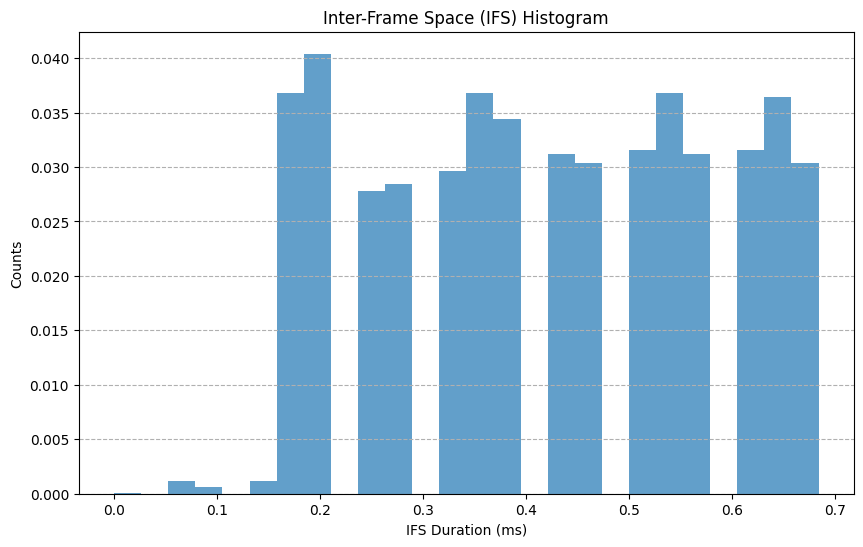

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_ifs_histogram(data_row):
    """
    Plots the Inter-Frame Space (IFS) histogram from a single row of the dataset.

    Args:
        data_row (list or numpy.ndarray): A list or array representing a single row
                                          in the format (x1, ..., x26, y1, ..., y26, s, r, l).
    """

    # Get IFS values and the corresponding counts
    x_values = np.array(data_row[:26])
    y_counts = np.array(data_row[26:52])

    # Calculate the bin edges based on x_values
    bin_edges = [0] + list(x_values)

    # Create the histogram plot
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], y_counts, width=np.diff(bin_edges)[0], align='edge', alpha=0.7)

    # Add labels and title
    plt.xlabel("IFS Duration (ms)")
    plt.ylabel("Counts")
    plt.title("Inter-Frame Space (IFS) Histogram")
    plt.grid(axis='y', linestyle='--')

    # Show the plot
    plt.show()

# Example usage

# -> Read the data file
file_name = mypath + '/train_data.csv'
train_data_df = pd.read_csv(file_name, header=None)
print(train_data_df.head())

# -> Get a sample from the dataset and plot it
row_index = 1
sample_data = train_data_df.iloc[row_index].values
plot_ifs_histogram(sample_data)

## EXERCISES

### Exercise 1:
Define an approach for training and validating the model you are going to train with the proposed data. Then, perform the split accordingly.

In [10]:
# (response to exercise 1)
#We have read the csv file noticing the first row and column of the file are the labels so we make sure they are not taken into account.
#Then for the data split we have decided to have 70% as training (first split), and then the 30% remaining in validation.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv(mypath + '/train_data.csv', header=0, index_col=0)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)




### Exercise 2:

Define your ML model, so that it can be called for training and test. Examples of approaches that you could use (but not limited to):

*   Logistic Regression
*   K-Nearest Neighbors (KNN)
*   Decision Trees or Random Forests
*   Convolutional Neural Network (CNN)

In [11]:
# (response to exercise 2)
#We have chosen to use the Random Forest Classifier as our ML model as it can handle non linearity and is robust to overfitting.
#As proven by the training results where the accuracy turn out to be very close to 1 (0.9995) so we believe the model choosed is the correct one.
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


# Train a Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Validate
y_val_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))


Validation Accuracy: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2984
           1       1.00      1.00      1.00      3016

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



### Exercise 3:

Define the hyperparameters that you will use to train the model.

In [12]:
# (response to exercise 3)
#To define which parameters we are going to use for the model what we are going to is finding the optimal hyperparameters, that are agrupated in a list that consist of:
#the number of parameters, the maximum depth, the minimum sample split,the minimum soamples in the leafs and  the maximum number of features (We cnsider this the most essential parameters of the Random FOrest Classifier).
#For this we assign them a random integer from a range, and then we perform the operation to find the optimal ones taking into account the running time.
#We limited it to 10 iteration using 3 fold-cross validation and using the roc curve as with more iterations it was taking too long to obtain the results (Now does it in 5 minutes).
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['sqrt', 'log2', 0.5, 0.8]
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  # Number of  trials
    cv=3,       #Number of fold-Cross_Validation
    scoring='roc_auc',
    n_jobs=4,
    verbose=2
)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best validation AUC:", random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 145}
Best validation AUC: 0.9999995713032609


### Exercise 4:
Train the model and show the procedure (e.g., evolution of the training/validation loss).

In [13]:
# (response to exercise 4)
#We run the Random Forest Cassifier taking into accoint the best parameters that were obtained in the previous exercise.
#Then we plot the learning curves of the algorithm using the loss values obtained. We can see that the model is working correctly as we
# obtain a curve that does not increase in neither of both cases which confirms that there is also no overfitting.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# Optimal hyperparameters (replace with yours)
best_params = {
    'n_estimators': 73,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 0.5,
    'random_state': 42
}

# Initialize and train
model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5, n_estimators=73, random_state=42)

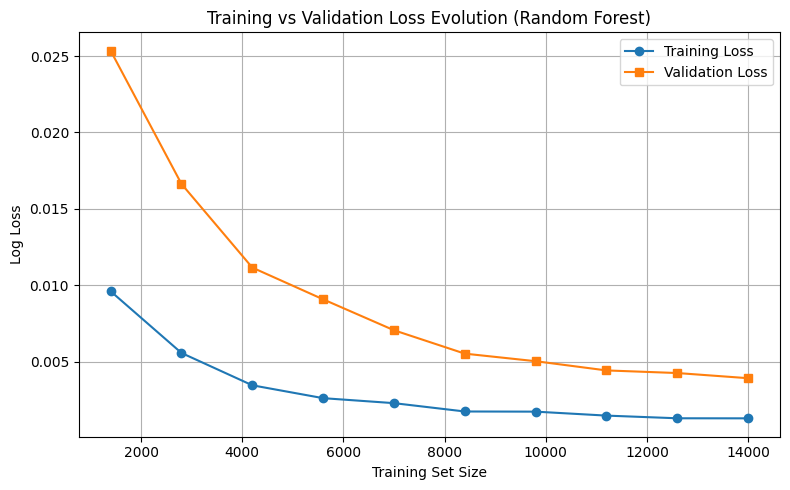

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss


# Learning curve setup
train_sizes = np.linspace(0.1, 1.0, 10)
train_losses = []
val_losses = []

for frac in train_sizes:
    n_samples = int(frac * len(X_train))
    X_subset = X_train[:n_samples]
    y_subset = y_train[:n_samples]

    model = RandomForestClassifier(**best_params)
    model.fit(X_subset, y_subset)

    # Training loss
    y_train_proba = model.predict_proba(X_subset)
    train_loss = log_loss(y_subset, y_train_proba)
    train_losses.append(train_loss)

    # Validation loss (on full val set)
    y_val_proba = model.predict_proba(X_val)
    val_loss = log_loss(y_val, y_val_proba)
    val_losses.append(val_loss)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(train_sizes * len(X_train), train_losses, marker='o', label='Training Loss')
plt.plot(train_sizes * len(X_train), val_losses, marker='s', label='Validation Loss')
plt.xlabel('Training Set Size')
plt.ylabel('Log Loss')
plt.title('Training vs Validation Loss Evolution (Random Forest)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



### Exercise 5:

Select and define the most appropriate evaluation metric(s). Discuss the appropriateness of your evaluation metrics for the binary classification problem we are considering.

In [18]:
# (response to exercise 5)
#We define the evaluation metrics we are more familiar with.
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    log_loss,
    confusion_matrix,
    classification_report
)

def evaluate_binary_classifier(model, X, y_true, set_name="Validation"):

    y_pred = model.predict(X)



    print(f"\n--- {set_name} Metrics ---")
    print(f"Accuracy      : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision     : {precision_score(y_true, y_pred):.4f}")
    print(f"Recall        : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score      : {f1_score(y_true, y_pred):.4f}")



    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))



### Exercise 6:

Evaluate your trained model on the test set, using the evaluation metrics that you have proposed. Remember that the test data should have not been seen by the model, so that we can properly estimate of its generalization capabilities.

In [20]:
# (response to exercise 6)
#We use the evaluation metrics defined in the exercise above and we obtain satisfactory results.
model = RandomForestClassifier().fit(X_train, y_train)

# Then evaluate:
evaluate_binary_classifier(model, X_val, y_val, set_name="Validation")
evaluate_binary_classifier(model, X_train, y_train, set_name="Trainning")




--- Validation Metrics ---
Accuracy      : 0.9992
Precision     : 0.9997
Recall        : 0.9987
F1 Score      : 0.9992

Confusion Matrix:
[[2983    1]
 [   4 3012]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2984
           1       1.00      1.00      1.00      3016

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000


--- Trainning Metrics ---
Accuracy      : 1.0000
Precision     : 1.0000
Recall        : 1.0000
F1 Score      : 1.0000

Confusion Matrix:
[[7017    0]
 [   0 6982]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7017
           1       1.00      1.00      1.00      6982

    accuracy                           1.00     13999
   macro avg       1.00      1.00      1.00     13999
weighted avg       1.0